In [1]:
# Tratamiento de datos
import pandas as pd
import numpy as np

from sklearn.impute import SimpleImputer

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
from scipy.stats import shapiro, kstest

import re

# Configuración
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

## 1. EDA

Primer análisis exploratorio:

- 60160 filas y 22 columnas
- No hay filas duplicadas
- Las columnas se pueden renombrar por buenas prácticas usando el guión bajo



### Las columnas son las siguientes:

0. Tweet Id (object) 
1. Tweet URL (object) 
    - Útil para poder acceder al tweet real. 
2. Tweet Posted Time (UTC) (object) 
    - Crear una nueva columna con solo la fecha
    - Crear una nueva columna con solo la hora
3. Tweet Content (object) 
    - Acceder a lo que está escrito después del # y del @
4. Tweet Type (object)  
    - ReTweet    45291
    - Tweet      13734
    - Reply       1135
5. Client (object) 
    - Tiene muchos valores únicos, pero quizá se puede realizar un TOP5
6. Retweets Received (int64)  
7. Likes Received (int64)  
8. Tweet Location (object) 
    - No se ha rellenado de forma consistente, buscar un modo de limpiar los datos, sin perder demasiados. 
    - Tiene un numero considerable de nulos.
9. Lat (float64)
    - Casi todo Nulos
    - Eliminar
10. Long (float64)
    - Casi todo Nulos
    - Eliminar
11. Tweet Language (object) 
    - No se ha rellenado de forma consistente, buscar un modo de limpiar los datos, sin perder demasiados. 
    - Tiene un numero considerable de nulos.
12. User Id (object) 
13. Name (object) 
    - Tiene un valor Nulo. Correguir UNK
14. Screen Name (object) 
15. User Bio (object) 
16. Verified or Non-Verified (object) 
    - Non-Verified    54236
    - Verified         5924
17. Profile URL (object) 
18. Protected or Non-protected (object) 
    - Todas son Non-protected
19. User Followers (int64)  
20. User Following (int64)  
21. User Account Creation Date (object)
    - Crear una nueva columna con solo la fecha, sin la hora

In [2]:
def apertura_exploracion(csv):

    """ Función para leer csv, convertir a df y hacer una primera exploración."""
    
    try:
        # Convertir el csv a DataFrame
        df = pd.read_csv(f"../files/{csv}.csv")        

        # Muestro las primeras filas
        display(df.head())

        # Obtengo las listas
        print(f"-----\n\nEl DataFrame tiene {df.shape[0]} filas y {df.shape[1]} columnas.\n-----")

        # Consulto si hay filas duplicadas
        print(f"\nEl número de filas duplicadas es {df.duplicated().sum()}\n-----")

        # Muestro el tipo de dato y si hay nulos por cada columna
        print("\nInformación del DataFrame:")
        df.info()

        # Muestro las estadísticas de columnas numéricas
        print("-----\n\nEstadísticas descriptivas:")
        display(df.describe().T)

        # Muestro las estadísticas de columnas no numéricas
        print("-----\n\nEstadísticas objetos:")
        display(df.describe(include="O").T)

        # Me devuelve un df que tendré que igualar a una variable
        return df  

    # Excepciones en caso de no enconrar el archivo o de que haya un error
    except FileNotFoundError:
        print(f"Error: No se encontró el archivo '../files/{csv}.csv'.")
        return None  
    
    except Exception as e:
        print(f"Ocurrió un error: {e}")
        return None 
    

In [3]:
df_covid = apertura_exploracion("COVID")

,Tweet Id,Tweet URL,Tweet Posted Time (UTC),Tweet Content,Tweet Type,Client,Retweets Received,Likes Received,Tweet Location,Lat,Long,Tweet Language,User Id,Name,Screen Name,User Bio,Verified or Non-Verified,Profile URL,Protected or Non-protected,User Followers,User Following,User Account Creation Date
0,"""1233417783175778304""",https://twitter.com/Giussi92/status/1233417783...,28 Feb 2020 15:44:49,Also the entire Swiss Football League is on ho...,Tweet,Twitter for iPhone,0,0,NaN,NaN,NaN,English,"""1556856595""",Giuseppe Gentile,Giussi92,NaN,Verified,https://twitter.com/Giussi92,Non-Protected,3071,100,30 Jun 2013 00:27:50
1,"""1233417742520332290""",https://twitter.com/LAMofficial/status/1233417...,28 Feb 2020 15:44:40,World Health Org Official: Trump’s press confe...,Tweet,Twitter Web App,0,0,Los Angeles CA USA,NaN,NaN,English,"""113738369""",London After Midnight,LAMofficial,London After Midnight is a music project by wr...,Verified,https://twitter.com/LAMofficial,Non-Protected,4189,84,12 Feb 2010 21:43:17
2,"""1233417741027225602""",https://twitter.com/mitchellvii/status/1233417...,28 Feb 2020 15:44:39,"I mean, Liberals are cheer-leading this #Coron...",Tweet,Twitter Web App,23,64,"Miami, FL",NaN,NaN,English,"""17980523""",Bill Mitchell,mitchellvii,Host of YourVoice™ America at http://yourvoice...,Verified,https://twitter.com/mitchellvii,Non-Protected,534045,10037,09 Dec 2008 01:54:21
3,"""1233417699264356357""",https://twitter.com/HelenKennedy/status/123341...,28 Feb 2020 15:44:29,"Under repeated questioning, Pompeo refuses to ...",Tweet,Twitter for iPhone,4,11,NYC and the North Fork,NaN,NaN,English,"""2199541""",Helen Kennedy,HelenKennedy,Newspaperman (ex NY Daily News &amp; Boston He...,Verified,https://twitter.com/HelenKennedy,Non-Protected,27704,1060,25 Mar 2007 19:14:46
4,"""1233417674274807808""",https://twitter.com/W7VOA/status/1233417674274...,28 Feb 2020 15:44:23,#coronavirus comments now from @larry_kudlow h...,Tweet,Twitter for iPhone,0,0,James S. Brady Press Briefing Room,NaN,NaN,English,"""17919393""",Steve Herman,W7VOA,@WhiteHouse bureau chief @VOANews. Member: @aa...,Verified,https://twitter.com/W7VOA,Non-Protected,94269,1999,06 Dec 2008 08:56:45


-----

El DataFrame tiene 60160 filas y 22 columnas.
-----

El número de filas duplicadas es 0
-----

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60160 entries, 0 to 60159
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Tweet Id                    60160 non-null  object 
 1   Tweet URL                   60160 non-null  object 
 2   Tweet Posted Time (UTC)     60160 non-null  object 
 3   Tweet Content               60160 non-null  object 
 4   Tweet Type                  60160 non-null  object 
 5   Client                      60160 non-null  object 
 6   Retweets Received           60160 non-null  int64  
 7   Likes Received              60160 non-null  int64  
 8   Tweet Location              40620 non-null  object 
 9   Lat                         19 non-null     float64
 10  Long                        19 non-null     float64
 11  Tweet Language  

,count,mean,std,min,25%,50%,75%,max
Retweets Received,60160.0,3.142886,106.443453,0.000000,0.000000,0.000000,0.00000,2.383200e+04
Likes Received,60160.0,5.272590,98.297300,0.000000,0.000000,0.000000,0.00000,1.752600e+04
Lat,19.0,-45.983002,91.125375,-122.395853,-111.911088,-82.616026,-31.06970,1.397000e+02
Long,19.0,32.120267,13.136373,-11.000000,33.947780,35.691324,39.68805,4.085376e+01
User Followers,60160.0,92749.349900,830970.664927,0.000000,145.000000,550.000000,2449.50000,2.127516e+07
User Following,60160.0,2193.177809,11963.820775,0.000000,204.000000,562.000000,1692.00000,1.182667e+06


-----

Estadísticas objetos:


,count,unique,top,freq
Tweet Id,60160,60160,"""1233417783175778304""",1
Tweet URL,60160,60160,https://twitter.com/Giussi92/status/1233417783...,1
Tweet Posted Time (UTC),60160,19450,31 Jan 2020 22:30:00,29
Tweet Content,60160,24943,RT @SaludPublicaEs: El Centro Nacional de Micr...,1943
Tweet Type,60160,3,ReTweet,45291
Client,60160,315,Twitter for Android,23250
Tweet Location,40620,14538,United States,702
Tweet Language,59012,43,English,33174
User Id,60160,43297,"""306127388""",249
Name,60159,41540,All Express News,249


In [4]:
df_covid.columns

Index(['Tweet Id', 'Tweet URL', 'Tweet Posted Time (UTC)', 'Tweet Content',
       'Tweet Type', 'Client', 'Retweets Received', 'Likes Received',
       'Tweet Location', 'Lat', 'Long', 'Tweet Language', 'User Id', 'Name',
       'Screen Name', 'User Bio', 'Verified or Non-Verified', 'Profile URL',
       'Protected or Non-protected', 'User Followers', 'User Following',
       'User Account Creation Date'],
      dtype='object')

In [5]:
df_covid['Tweet Type'].value_counts()

Tweet Type
ReTweet    45291
Tweet      13734
Reply       1135
Name: count, dtype: int64

In [6]:
df_covid['Client'].value_counts()

Client
Twitter for Android         23250
Twitter for iPhone          16951
Twitter Web App             12251
Twitter for iPad             1829
TweetDeck                    1673
                            ...  
jayhasgin                       1
Talon (Plus)                    1
Microsoft Power Platform        1
Amplifr                         1
UberSocial for Android          1
Name: count, Length: 315, dtype: int64

In [7]:
df_covid['Tweet Location'].value_counts()

Tweet Location
United States               702
Beijing, China              385
Venezuela                   303
USA                         303
España                      295
                           ... 
Gerringong NSW Australia      1
in my zone                    1
Mérida, España                1
ÜT: 10.169725,-64.650823      1
Jackson Hole, WY              1
Name: count, Length: 14538, dtype: int64

In [8]:
df_covid['Tweet Language'].value_counts()

Tweet Language
English       33174
Spanish       15814
Italian        2958
French         2932
Portuguese      912
Turkish         884
German          434
in              388
Chinese         283
Thai            271
Japanese        204
Tagalog         131
Catalan         104
Dutch            93
Arabic           79
Polish           69
Urdu             53
Russian          29
Greek            24
Danish           19
Farsi            18
Korean           18
Swedish          17
Hindi            15
Finnish          14
Tamil            13
Estonian         12
Czech             9
ht                9
Romanian          8
si                3
Slovenian         3
ml                3
Vietnamese        3
Latvian           2
Lithuanian        2
Welsh             2
Divehi            1
Pashto            1
Basque            1
iw                1
km                1
or                1
Name: count, dtype: int64

In [9]:
df_covid['Verified or Non-Verified'].value_counts()

Verified or Non-Verified
Non-Verified    54236
Verified         5924
Name: count, dtype: int64

In [10]:
df_covid['Protected or Non-protected'].value_counts()

Protected or Non-protected
Non-Protected    60160
Name: count, dtype: int64

In [11]:
df_covid['User Account Creation Date'].sample(5)

12653    31 May 2013 20:44:02
21799    16 Aug 2007 15:08:04
9514     20 Oct 2011 08:47:30
41721    17 Nov 2010 19:50:38
475      10 Mar 2010 00:44:07
Name: User Account Creation Date, dtype: object

## 2. Nulos

- Eliminio las columnas 'Lat' y 'Long', casi un 100& de Nulos, y puedo conseguir una información de ubicacion de la variable 'Tweet Location'
- 1 Nulo en Name que convierto a 'Unk'
- 'User Bio' tiene un 17% de Nulos, pero al ser información que no considero relevante, lo convierto a 'Unk'

** Quedan pendientes las variables 'Tweet Location' y 'Tweet Language', con un porcentaje de nulos del 32% y el 2% respectivamente **

In [12]:
df_covid.isna().sum()

Tweet Id                          0
Tweet URL                         0
Tweet Posted Time (UTC)           0
Tweet Content                     0
Tweet Type                        0
Client                            0
Retweets Received                 0
Likes Received                    0
Tweet Location                19540
Lat                           60141
Long                          60141
Tweet Language                 1148
User Id                           0
Name                              1
Screen Name                       0
User Bio                      10442
Verified or Non-Verified          0
Profile URL                       0
Protected or Non-protected        0
User Followers                    0
User Following                    0
User Account Creation Date        0
dtype: int64

In [13]:
round(df_covid.isna().sum()/60160*100,2)

Tweet Id                       0.00
Tweet URL                      0.00
Tweet Posted Time (UTC)        0.00
Tweet Content                  0.00
Tweet Type                     0.00
Client                         0.00
Retweets Received              0.00
Likes Received                 0.00
Tweet Location                32.48
Lat                           99.97
Long                          99.97
Tweet Language                 1.91
User Id                        0.00
Name                           0.00
Screen Name                    0.00
User Bio                      17.36
Verified or Non-Verified       0.00
Profile URL                    0.00
Protected or Non-protected     0.00
User Followers                 0.00
User Following                 0.00
User Account Creation Date     0.00
dtype: float64

In [14]:
# Sustituyo el único NaN de la variable 'Name' por Unk
df_covid["Name"] = df_covid["Name"].fillna("Unk")

In [15]:
# Elimino 'Lat' y 'Long' porque tengo otra variable de la que poder extraer la ubicación, y estas dos tienen demasiados Nulos.
df_covid.drop(columns=['Lat','Long'], inplace=True)

In [16]:
# Tiene un 17% de Nulos, pero es información que no considero relevante para el análisis. 
# En lugar de eliminar la información, decido sustituir los Nulos por 'Unk'
df_covid['User Bio'] = df_covid['User Bio'].fillna('Unk')

In [17]:
round(df_covid.isna().sum()/60160*100,2)

Tweet Id                       0.00
Tweet URL                      0.00
Tweet Posted Time (UTC)        0.00
Tweet Content                  0.00
Tweet Type                     0.00
Client                         0.00
Retweets Received              0.00
Likes Received                 0.00
Tweet Location                32.48
Tweet Language                 1.91
User Id                        0.00
Name                           0.00
Screen Name                    0.00
User Bio                       0.00
Verified or Non-Verified       0.00
Profile URL                    0.00
Protected or Non-protected     0.00
User Followers                 0.00
User Following                 0.00
User Account Creation Date     0.00
dtype: float64

## 3. Limpieza

- 'Tweet Content', creo dos nuevas columnas con la siguiente información:
    - Funcion para extraer la palabra inmediatemente posterior a # (Hasthag)
    - Funcion para extraer la palabra inmediatemente posterior a @ (Menciones)

- 'User Account Creation Date', creo una nueva columna 'account_creation_year' en la que se guardará solo el año de creación, el resto de informaicón no es relevante.

- Tweet Posted Time (UTC), creo dos nuevas columnas:
    - Una con solo la fecha
    - Otra con solo la hora

- 


In [18]:
# Función para extraer el primer hashtag
def extraer_hashtag(texto):
    match = re.search(r'#(\w+)', str(texto))
    return match.group(1) if match else 'Unk'

In [19]:
# Función para extraer la primera mención
def extraer_mencion(texto):
    match = re.search(r'@(\w+)', str(texto))
    return match.group(1) if match else 'Unk'

In [20]:
# Aplico funciones a la columna 'Tweet Content'
df_covid['hashtag'] = df_covid['Tweet Content'].apply(extraer_hashtag)
df_covid['mention'] = df_covid['Tweet Content'].apply(extraer_mencion)

In [21]:
df_covid[['Tweet Content', 'hashtag', 'mention']].head()

,Tweet Content,hashtag,mention
0,Also the entire Swiss Football League is on ho...,coronavirus,Unk
1,World Health Org Official: Trump’s press confe...,coronavirus,Unk
2,"I mean, Liberals are cheer-leading this #Coron...",Coronavirus,Unk
3,"Under repeated questioning, Pompeo refuses to ...",COVID19,Unk
4,#coronavirus comments now from @larry_kudlow h...,coronavirus,larry_kudlow


In [22]:
# De esta columna decido quedarme solo con el año de creación de la cuenta, el resto me parece irrelevante.
df_covid['User Account Creation Date'].sample(5)

26197    11 Nov 2019 23:59:28
50105    16 Feb 2016 15:38:23
42529    30 Jan 2015 22:13:50
24979    30 Sep 2015 09:06:31
23020    26 Jul 2014 12:57:48
Name: User Account Creation Date, dtype: object

In [23]:
# Creo una nueva columna 'account_creation_year' en la que se guardará solo el año de creación 
df_covid['account_creation_year'] = df_covid['User Account Creation Date'].str.split(" ").str[2]

In [24]:
# Compruebo nulos
df_covid['account_creation_year'].isna().sum()

0

In [25]:
# Compruebo los datos que se han generado en esta nueva columna
df_covid['account_creation_year'].value_counts().sort_index()

account_creation_year
2006      10
2007     407
2008    1237
2009    7062
2010    5439
2011    6737
2012    5509
2013    4589
2014    3868
2015    3718
2016    3992
2017    4342
2018    4674
2019    7004
2020    1572
Name: count, dtype: int64

In [26]:
df_covid['Tweet Posted Time (UTC)'].sample(5)

2110     21 Feb 2020 16:20:05
1973     21 Feb 2020 17:43:00
30551    31 Jan 2020 23:12:56
3615     21 Feb 2020 03:23:00
52490    31 Jan 2020 22:06:42
Name: Tweet Posted Time (UTC), dtype: object

In [27]:
# Convertir 'Tweet Posted Time (UTC)' a formato fecha
df_covid['Tweet Posted Time (UTC)'] = pd.to_datetime(df_covid['Tweet Posted Time (UTC)'], format='%d %b %Y %H:%M:%S')

In [28]:
df_covid['tweet_posted_hour'] = df_covid['Tweet Posted Time (UTC)'].dt.time

In [29]:
df_covid['tweet_posted_date'] = df_covid['Tweet Posted Time (UTC)'].dt.date

In [30]:
df_covid.head()

,Tweet Id,Tweet URL,Tweet Posted Time (UTC),Tweet Content,Tweet Type,Client,Retweets Received,Likes Received,Tweet Location,Tweet Language,User Id,Name,Screen Name,User Bio,Verified or Non-Verified,Profile URL,Protected or Non-protected,User Followers,User Following,User Account Creation Date,hashtag,mention,account_creation_year,tweet_posted_hour,tweet_posted_date
0,"""1233417783175778304""",https://twitter.com/Giussi92/status/1233417783...,2020-02-28 15:44:49,Also the entire Swiss Football League is on ho...,Tweet,Twitter for iPhone,0,0,NaN,English,"""1556856595""",Giuseppe Gentile,Giussi92,Unk,Verified,https://twitter.com/Giussi92,Non-Protected,3071,100,30 Jun 2013 00:27:50,coronavirus,Unk,2013,15:44:49,2020-02-28
1,"""1233417742520332290""",https://twitter.com/LAMofficial/status/1233417...,2020-02-28 15:44:40,World Health Org Official: Trump’s press confe...,Tweet,Twitter Web App,0,0,Los Angeles CA USA,English,"""113738369""",London After Midnight,LAMofficial,London After Midnight is a music project by wr...,Verified,https://twitter.com/LAMofficial,Non-Protected,4189,84,12 Feb 2010 21:43:17,coronavirus,Unk,2010,15:44:40,2020-02-28
2,"""1233417741027225602""",https://twitter.com/mitchellvii/status/1233417...,2020-02-28 15:44:39,"I mean, Liberals are cheer-leading this #Coron...",Tweet,Twitter Web App,23,64,"Miami, FL",English,"""17980523""",Bill Mitchell,mitchellvii,Host of YourVoice™ America at http://yourvoice...,Verified,https://twitter.com/mitchellvii,Non-Protected,534045,10037,09 Dec 2008 01:54:21,Coronavirus,Unk,2008,15:44:39,2020-02-28
3,"""1233417699264356357""",https://twitter.com/HelenKennedy/status/123341...,2020-02-28 15:44:29,"Under repeated questioning, Pompeo refuses to ...",Tweet,Twitter for iPhone,4,11,NYC and the North Fork,English,"""2199541""",Helen Kennedy,HelenKennedy,Newspaperman (ex NY Daily News &amp; Boston He...,Verified,https://twitter.com/HelenKennedy,Non-Protected,27704,1060,25 Mar 2007 19:14:46,COVID19,Unk,2007,15:44:29,2020-02-28
4,"""1233417674274807808""",https://twitter.com/W7VOA/status/1233417674274...,2020-02-28 15:44:23,#coronavirus comments now from @larry_kudlow h...,Tweet,Twitter for iPhone,0,0,James S. Brady Press Briefing Room,English,"""17919393""",Steve Herman,W7VOA,@WhiteHouse bureau chief @VOANews. Member: @aa...,Verified,https://twitter.com/W7VOA,Non-Protected,94269,1999,06 Dec 2008 08:56:45,coronavirus,larry_kudlow,2008,15:44:23,2020-02-28


In [31]:
# Las ubicaciones no están unificadas, lo que implica que cada usuario ha podido rellenar libremente, y las posibilidades son infinitas
df_covid['Tweet Location'].value_counts()

Tweet Location
United States               702
Beijing, China              385
Venezuela                   303
USA                         303
España                      295
                           ... 
Gerringong NSW Australia      1
in my zone                    1
Mérida, España                1
ÜT: 10.169725,-64.650823      1
Jackson Hole, WY              1
Name: count, Length: 14538, dtype: int64

In [32]:
df_covid['Tweet Location'].isna().sum()

19540

In [33]:
# Sustituyo los Nulos por 'Unk', ya que de lo contrario, algunos Nan, me los coge como 'Namibia' 
df_covid['Tweet Location'] = df_covid['Tweet Location'].fillna('Unk')

In [34]:
# Lista de nombres de países y códigos comunes de chat gpt
paises_codigos = [
    'usa', 'us', 'united states', 'uk', 'united kingdom', 'england',
    'afghanistan', 'af', 'albania', 'al', 'algeria', 'dz', 'andorra', 'ad',
    'angola', 'ao', 'argentina', 'ar', 'armenia', 'am', 'australia', 'au',
    'austria', 'at', 'azerbaijan', 'az', 'bahamas', 'bs', 'bahrain', 'bh',
    'bangladesh', 'bd', 'barbados', 'bb', 'belarus', 'by', 'belgium', 'be',
    'belize', 'bz', 'benin', 'bj', 'bhutan', 'bt', 'bolivia', 'bo',
    'bosnia', 'ba', 'botswana', 'bw', 'brazil', 'br', 'brunei', 'bn',
    'bulgaria', 'bg', 'burkina faso', 'bf', 'burundi', 'bi', 'cambodia', 'kh',
    'cameroon', 'cm', 'canada', 'ca', 'cape verde', 'cv', 'chad', 'td',
    'chile', 'cl', 'china', 'cn', 'colombia', 'co', 'comoros', 'km',
    'congo', 'cg', 'costa rica', 'cr', 'croatia', 'hr', 'cuba', 'cu',
    'cyprus', 'cy', 'czech republic', 'cz', 'denmark', 'dk', 'djibouti', 'dj',
    'dominican republic', 'do', 'ecuador', 'ec', 'egypt', 'eg', 'el salvador', 'sv',
    'estonia', 'ee', 'ethiopia', 'et', 'finland', 'fi', 'france', 'fr',
    'gabon', 'ga', 'gambia', 'gm', 'georgia', 'ge', 'germany', 'de',
    'ghana', 'gh', 'greece', 'gr', 'guatemala', 'gt', 'guinea', 'gn',
    'haiti', 'ht', 'honduras', 'hn', 'hungary', 'hu', 'iceland', 'is',
    'india', 'in', 'indonesia', 'id', 'iran', 'ir', 'iraq', 'iq',
    'ireland', 'ie', 'israel', 'il', 'italy', 'it', 'jamaica', 'jm',
    'japan', 'jp', 'jordan', 'jo', 'kazakhstan', 'kz', 'kenya', 'ke',
    'kuwait', 'kw', 'kyrgyzstan', 'kg', 'laos', 'la', 'latvia', 'lv',
    'lebanon', 'lb', 'liberia', 'lr', 'libya', 'ly', 'lithuania', 'lt',
    'luxembourg', 'lu', 'madagascar', 'mg', 'malawi', 'mw', 'malaysia', 'my',
    'maldives', 'mv', 'mali', 'ml', 'malta', 'mt', 'mexico', 'mx',
    'moldova', 'md', 'monaco', 'mc', 'mongolia', 'mn', 'montenegro', 'me',
    'morocco', 'ma', 'mozambique', 'mz', 'myanmar', 'mm', 'namibia', 'na',
    'nepal', 'np', 'netherlands', 'nl', 'new zealand', 'nz', 'nicaragua', 'ni',
    'niger', 'ne', 'nigeria', 'ng', 'north korea', 'kp', 'norway', 'no',
    'oman', 'om', 'pakistan', 'pk', 'panama', 'pa', 'paraguay', 'py',
    'peru', 'pe', 'philippines', 'ph', 'poland', 'pl', 'portugal', 'pt',
    'qatar', 'qa', 'romania', 'ro', 'russia', 'ru', 'rwanda', 'rw',
    'saudi arabia', 'sa', 'senegal', 'sn', 'serbia', 'rs', 'singapore', 'sg',
    'slovakia', 'sk', 'slovenia', 'si', 'somalia', 'so', 'south africa', 'za',
    'south korea', 'kr', 'spain', 'es', 'sri lanka', 'lk', 'sudan', 'sd',
    'sweden', 'se', 'switzerland', 'ch', 'syria', 'sy', 'taiwan', 'tw',
    'tajikistan', 'tj', 'tanzania', 'tz', 'thailand', 'th', 'togo', 'tg',
    'tunisia', 'tn', 'turkey', 'tr', 'turkmenistan', 'tm', 'uganda', 'ug',
    'ukraine', 'ua', 'united arab emirates', 'ae', 'uruguay', 'uy',
    'uzbekistan', 'uz', 'venezuela', 've', 'vietnam', 'vn', 'yemen', 'ye',
    'zambia', 'zm', 'zimbabwe', 'zw'
]

In [35]:
# Función para extraer país o código
def extraer_pais(texto):
    texto = str(texto).lower()
    for pais in paises_codigos:
        if pais in texto:
            return pais
    return 'Other'

In [36]:
# Aplicamos la función a la columna
df_covid['tweet_location_clean'] = df_covid['Tweet Location'].apply(extraer_pais)

In [37]:
# Sustituir los códigos por nombre de países completos
country_map = {}
for i in range(0, len(paises_codigos), 2):
    country = paises_codigos[i]
    alias = paises_codigos[i + 1]
    country_map[country] = country
    country_map[alias] = country

In [38]:
country_map

{'usa': 'usa',
 'us': 'usa',
 'united states': 'united states',
 'uk': 'united states',
 'united kingdom': 'united kingdom',
 'england': 'united kingdom',
 'afghanistan': 'afghanistan',
 'af': 'afghanistan',
 'albania': 'albania',
 'al': 'albania',
 'algeria': 'algeria',
 'dz': 'algeria',
 'andorra': 'andorra',
 'ad': 'andorra',
 'angola': 'angola',
 'ao': 'angola',
 'argentina': 'argentina',
 'ar': 'argentina',
 'armenia': 'armenia',
 'am': 'armenia',
 'australia': 'australia',
 'au': 'australia',
 'austria': 'austria',
 'at': 'austria',
 'azerbaijan': 'azerbaijan',
 'az': 'azerbaijan',
 'bahamas': 'bahamas',
 'bs': 'bahamas',
 'bahrain': 'bahrain',
 'bh': 'bahrain',
 'bangladesh': 'bangladesh',
 'bd': 'bangladesh',
 'barbados': 'barbados',
 'bb': 'barbados',
 'belarus': 'belarus',
 'by': 'belarus',
 'belgium': 'belgium',
 'be': 'belgium',
 'belize': 'belize',
 'bz': 'belize',
 'benin': 'benin',
 'bj': 'benin',
 'bhutan': 'bhutan',
 'bt': 'bhutan',
 'bolivia': 'bolivia',
 'bo': 'boliv

In [39]:
# Corrección de un valor incorrecto
country_map['uk'] = 'united kingdom'

In [40]:
# Aplicar el mapeo a la columna 'tweet_location_clean' y guardar el resultado en una nueva columna 'tweet_country'
df_covid['tweet_country'] = df_covid['tweet_location_clean'].str.lower().map(country_map)

In [41]:
df_covid[['Tweet Location', 'tweet_location_clean', 'tweet_country']].head(6)

,Tweet Location,tweet_location_clean,tweet_country
0,Unk,Other,NaN
1,Los Angeles CA USA,usa,usa
2,"Miami, FL",am,armenia
3,NYC and the North Fork,no,norway
4,James S. Brady Press Briefing Room,ad,andorra
5,Unk,Other,NaN


In [42]:
# Sustituir los Nulos por 'Unk'
df_covid['tweet_country'] = df_covid['tweet_country'].fillna('Unk')

In [43]:
df_covid['tweet_country'] = df_covid['tweet_country'].str.capitalize()

In [44]:
df_covid['tweet_country'].value_counts()

tweet_country
Unk           21877
Albania        4974
Argentina      4190
Usa            3333
Andorra        2739
              ...  
Nepal             1
Cape verde        1
Djibouti          1
Botswana          1
Togo              1
Name: count, Length: 138, dtype: int64

In [43]:
# Elimino las columnas que ya no necesito
df_covid.drop(columns=['tweet_location_clean', 'Tweet Location'], inplace=True)

In [47]:
# Contar el numero de veces que aparece
apariciones = df_covid["Tweet Language"].value_counts()

# Crear una máscara para los idiomas con menos de 10 apariciones
ocasionales = apariciones[apariciones < 10].index

# Reemplazar esos idiomas con 'Other'
df_covid["Tweet Language"] = df_covid["Tweet Language"].apply(lambda x: 'Other' if x in ocasionales else x)


In [49]:
df_covid["Tweet Language"].isna().sum()

1148

In [50]:
df_covid["Tweet Language"] = df_covid["Tweet Language"].fillna('Unk')

In [53]:
# Sustituyo el único valor que se ha quedado en formato código por su nombre correspondiente
df_covid["Tweet Language"] = df_covid["Tweet Language"].replace('in', 'Indonesian')

In [54]:
df_covid["Tweet Language"].value_counts()

Tweet Language
English       33174
Spanish       15814
Italian        2958
French         2932
Unk            1148
Portuguese      912
Turkish         884
German          434
Indonesian      388
Chinese         283
Thai            271
Japanese        204
Tagalog         131
Catalan         104
Dutch            93
Arabic           79
Polish           69
Urdu             53
Other            50
Russian          29
Greek            24
Danish           19
Korean           18
Farsi            18
Swedish          17
Hindi            15
Finnish          14
Tamil            13
Estonian         12
Name: count, dtype: int64

In [ ]:
# Limpieza y gestión de Nulos terminados
round(df_covid.isna().sum()/60160*100,2)

Tweet Id                      0.0
Tweet URL                     0.0
Tweet Posted Time (UTC)       0.0
Tweet Content                 0.0
Tweet Type                    0.0
Client                        0.0
Retweets Received             0.0
Likes Received                0.0
Tweet Language                0.0
User Id                       0.0
Name                          0.0
Screen Name                   0.0
User Bio                      0.0
Verified or Non-Verified      0.0
Profile URL                   0.0
Protected or Non-protected    0.0
User Followers                0.0
User Following                0.0
User Account Creation Date    0.0
hashtag                       0.0
mention                       0.0
account_creation_year         0.0
tweet_posted_hour             0.0
tweet_posted_date             0.0
tweet_country                 0.0
dtype: float64

##### -> Duplicados 

In [ ]:
#NNo hay filas duplicadas
df_covid.duplicated().sum()

In [ ]:
# Existen 16863 'User Id' duplicados, lo que indica que los usuarios publicaron en más de alguna ocasión. 
df_covid["User Id"].duplicated().sum()

In [ ]:
# Son más los nombres duplicados, pero puede ser que el nombre sea igual para más personas.
df_covid["Name"].duplicated().sum()

##### -> Limpiar columna "Tweet Language" para agrupar los más relevantes

In [45]:
df_covid.columns

Index(['Tweet Id', 'Tweet URL', 'Tweet Posted Time (UTC)', 'Tweet Content',
       'Tweet Type', 'Client', 'Retweets Received', 'Likes Received',
       'Tweet Location', 'Tweet Language', 'User Id', 'Name', 'Screen Name',
       'User Bio', 'Verified or Non-Verified', 'Profile URL',
       'Protected or Non-protected', 'User Followers', 'User Following',
       'User Account Creation Date', 'hashtag', 'mention',
       'account_creation_year', 'tweet_posted_hour', 'tweet_posted_date',
       'tweet_location_clean', 'tweet_country'],
      dtype='object')

In [46]:
# Función para convertir a snake_case
def to_snake_case(col):
    return col.strip().lower().replace(' ', '_').replace('-', '_')




In [47]:
# Aplicar la función a todas las columnas
df_covid.columns = [to_snake_case(col) for col in df_covid.columns]

In [48]:
df_covid.columns

Index(['tweet_id', 'tweet_url', 'tweet_posted_time_(utc)', 'tweet_content',
       'tweet_type', 'client', 'retweets_received', 'likes_received',
       'tweet_location', 'tweet_language', 'user_id', 'name', 'screen_name',
       'user_bio', 'verified_or_non_verified', 'profile_url',
       'protected_or_non_protected', 'user_followers', 'user_following',
       'user_account_creation_date', 'hashtag', 'mention',
       'account_creation_year', 'tweet_posted_hour', 'tweet_posted_date',
       'tweet_location_clean', 'tweet_country'],
      dtype='object')

## 3. Guardar CSV

In [49]:
df_covid.to_csv("../files/Covid_clean.csv", index=False)

## 4. Análisis

##### -> Establezco una paleta de color para todas las gráficas

In [50]:
custom_palette = "mako"  # Puedes cambiar por "viridis", "rocket", "coolwarm", etc.
sns.set_palette(custom_palette)

# Establecer estilo general para seaborn y matplotlib
sns.set_style("whitegrid")  # Puedes usar "darkgrid", "white", "ticks", etc.
plt.rcParams.update({
    'figure.figsize': (10, 6),
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'axes.edgecolor': 'gray',
    'axes.grid': True,
    'grid.color': 'lightgray'
})

##### -> Analizo correlaciones numéricas

In [51]:
df_corr = df_covid.corr(numeric_only=True)
df_corr

,retweets_received,likes_received,user_followers,user_following
retweets_received,1.000000,0.904214,0.040819,0.004224
likes_received,0.904214,1.000000,0.086309,0.005087
user_followers,0.040819,0.086309,1.000000,0.022251
user_following,0.004224,0.005087,0.022251,1.000000


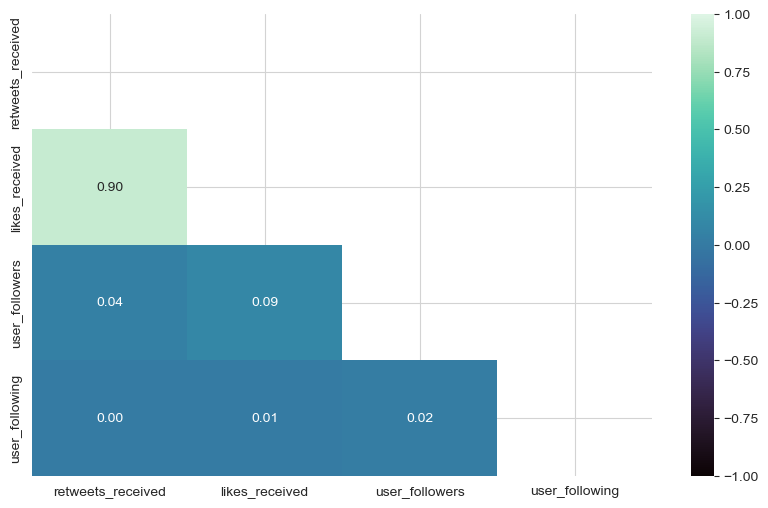

In [52]:
# Crear una matriz booleana de máscara
mask = np.triu(np.ones_like(df_corr, dtype=bool))

# Crear un heatmap con la máscara
sns.heatmap(df_corr, 
            annot = True, 
            fmt = ".2f", 
            cmap = "mako", 
            vmax = 1, 
            vmin = -1, 
            mask = mask);

In [53]:
df_covid.columns

Index(['tweet_id', 'tweet_url', 'tweet_posted_time_(utc)', 'tweet_content',
       'tweet_type', 'client', 'retweets_received', 'likes_received',
       'tweet_location', 'tweet_language', 'user_id', 'name', 'screen_name',
       'user_bio', 'verified_or_non_verified', 'profile_url',
       'protected_or_non_protected', 'user_followers', 'user_following',
       'user_account_creation_date', 'hashtag', 'mention',
       'account_creation_year', 'tweet_posted_hour', 'tweet_posted_date',
       'tweet_location_clean', 'tweet_country'],
      dtype='object')

##### -> Distribución de años de creación de las cuentas

In [55]:
# Ordenar el DataFrame por año antes de graficar (por si acaso)
df_covid_sorted = df_covid.sort_values('account_creation_year')



<Axes: xlabel='account_creation_year', ylabel='Count'>

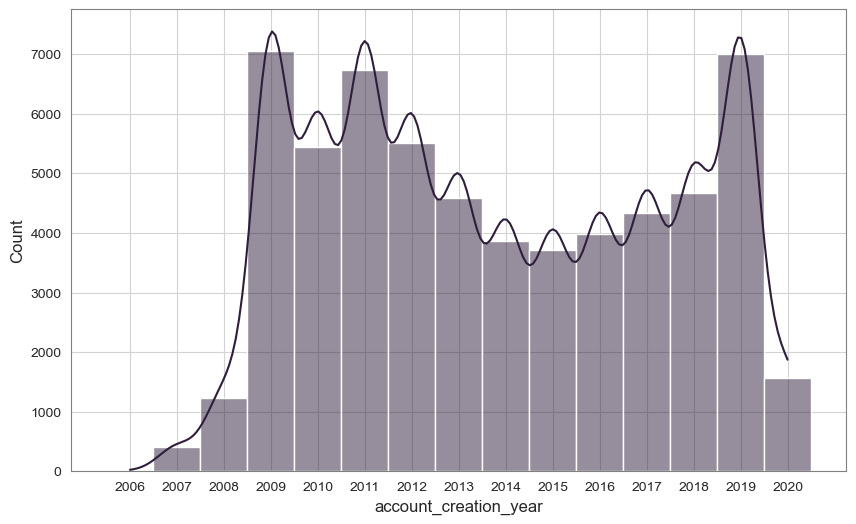

In [56]:
# Histplot con eje y ordenado por año
sns.histplot(x='account_creation_year', data=df_covid_sorted, discrete=True, kde=True)